# 3 Fraude en transacciones bancarias

In [1]:
import pandas as pd
import urllib
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

#### (a) Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

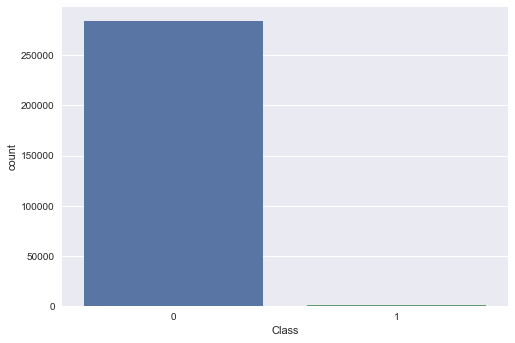

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dt = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

In [3]:
count_class = pd.value_counts(dt['Class'].values)
print("===================================================")
print("Cantidad de elementos por clase")
print("===================================================")
print("Elementos pertenecientes a la clase 0 es de", count_class[0])
print("Elementos pertenecientes a la clase 1 es de", count_class[1])
print("===================================================")

Cantidad de elementos por clase
Elementos pertenecientes a la clase 0 es de 284315
Elementos pertenecientes a la clase 1 es de 492


Como podemos apreciar el dataset se encuentra desbalanceado y la diferencia es muy significativa por lo que esto puede traer problemas a la hora de hacer la clasificación de los datos, es decir la clasificacion puede quedar sesgada hacia la clase que posee una mayor cantidad de elementos.

In [4]:
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Otro dato a tener enconsideracion es la cantidad de caracteristicas que posee este dataset, como podemos apreciar este dataset contiene un total de 30 (Tiempo + monto y otras 28 sin nombre).

#### (b) Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [5]:
from sklearn.preprocessing import StandardScaler
# Se agrega la columna nAmount con los datos de Amount normalizados 
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
# Se eliminan la columna del tiempo y amount
dt.drop(["Time","Amount"],axis=1,inplace=True)

In [6]:
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Se realiza la estandarización al atributo amount ya que este se encuentra en una escala distinta del resto de las caracteristicas.

#### (c) Defina una función que reciba como input un modelo, los datos de entrenamiento y datos de testeo. Esta funcion deberia mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas metricas. Debería además mostrar una curva ROC junto al valor del area bajo la curva de esta. Finalmente, responda las siguientes preguntas ¿Qu´e es una matriz deconfusión? ¿Que métricas se pueden calcular de esta y cuales nos serán útiles en este experimento? ¿Que es una curva ROC y qu´e relaci´on tiene con la matriz de confusi´on?

In [7]:
from sklearn.metrics import roc_curve, auc

def model(model,features_train,features_test,labels_train,labels_test):
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[1,0])))
    fig= plt.figure(figsize=(6,3))
    print("TP: %d"%cnf_matrix[1,1,])
    print("TN: %d"%cnf_matrix[0,0])
    print("FP: %d"%cnf_matrix[0,1])
    print("FN: %d"%cnf_matrix[1,0])
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    
    ''' You have to complete this function, ROC Curve is missing'''
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

http://www2.cs.uregina.ca/~dbd/cs831/notes/confusion_matrix/confusion_matrix.html

Una matriz de confucion es una herramienta generalmente utilizada en problemas de aprendisaje supervisad, donde la información que contiene es acerca de las clasificaciones actuales y predicciones hechas por un sistema de clasificación. Su tamaño será de $nxn$, donde $n$ es el número de clases.



#### (d) Defina una función que genere un Training y Testing Set de un Dataset cualquiera. Indique que está haciendo la función.

In [8]:
from sklearn.model_selection import train_test_split

def data_prepration(x):
    #Se guardan solo las caracteristicas, se omite la columna Class.
    x_features= x.iloc[:,x.columns != "Class"]
    #Se guradan solo las etiquetas correspondietes a las clases.
    x_labels=x.iloc[:,x.columns=="Class"]
    #Se separan en subconjuntos los datas, asignando para entrenamiento y testing.
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    #Se imprime el largo de los nuevos datasets generados. 
    print("Length of training data: %d"%len(x_train))
    print("Length of test data: %d"%len(x_test))
    #Se retornan el train_set y test_set 
    return(x_train,x_test,y_train,y_test)

La funcion data_prepration recibe como input el dataset completo y divide este en las caracteristicas y las clases, luego se aplica la funcion train_test_split a esos dos nuevos subconjuntos para generar los datasets respectivos para entrenamiento y pruebas, es decir x_train, y_train, x_test, y_test. Finalmente retorna estos datasets.

In [9]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)

Length of training data: 199364
Length of test data: 85443


#### (e) Defina una función que realice Undersample [8] . ¿Explique en que consiste esta técnica?

In [10]:
def undersample(data,times):
    #Se obtienen los indeces de los elementos pertenecientes a cada clase
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    #Se obtiene la cantidad de elementos de cada clase
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    #Se escogen al azar indices normales 
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    #Se seleccionan los indices del datsset reducido
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    #Se crea el dataset reducido
    undersample_data = data.iloc[undersample_data,:]
    #Se indica la proporcion de cada clase.
    normal = (float(len(undersample_data[undersample_data.Class==0]))/len(undersample_data["Class"]))
    print("The normal transacation proportion is : %f"%normal)
    fraud = (float(len(undersample_data[undersample_data.Class==1]))/len(undersample_data["Class"]))
    print("The fraud transacation proportion is : %f"%fraud)
    return(undersample_data)

Undersampling es una de las tecnicas más simple para trabajar con datos desbalanceados. Esta tecnica consiste en seleccionar de forma aleatoria parte de los datos pertenecientes a la clase mayoritaria y eliminandolos hasta que quede equilibrio con la clase minoritaria. El problema de  realizar esta eliminacion en los datos es que se puede perder informacion que puede ser util a la hora de realizar la clasificación


Fuente: https://www.irjet.net/archives/V4/i8/IRJET-V4I857.pdf

#### (f) Genere un modelo de Logistic Regression y otro a su elección utilizando UnderSample [8] . Concluya a partir de los resultados.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, recall_score, precision_recall_curve, auc, roc_curve, roc_auc_score, classification_report

x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
#print(x_tr["Class"])
x_tr = x_tr.reset_index(drop=True)

def apply_log_regression(i):
    print("The undersample data for " + str(i) + " proportion\n")
    Undersample_data = undersample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,under_x,x_ts,under_yx,y_ts)
    print("---------------------------------------------------------------")

def apply_naive_bayes(i):
    print("The undersample data for " + str(i) + " proportion\n")
    Undersample_data = undersample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf = BernoulliNB()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,under_x,x_ts,under_yx,y_ts)
    print("---------------------------------------------------------------")


Length of training data: 199364
Length of test data: 85443


The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 457
Length of test data: 197
The recall for this model is: 0.887640
TP: 79
TN: 102
FP: 6
FN: 10


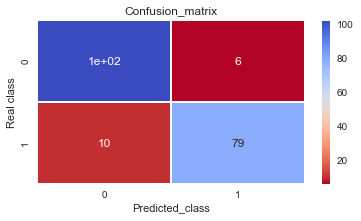


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.94      0.93       108
          1       0.93      0.89      0.91        89

avg / total       0.92      0.92      0.92       197



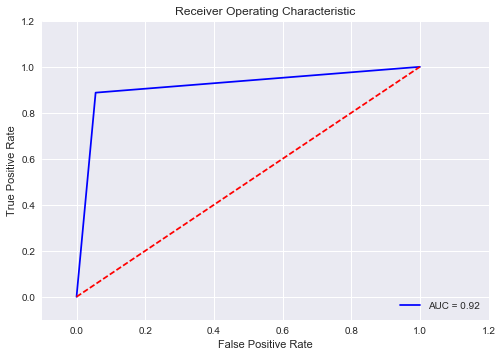

--------------------------Testing Set---------------------------
The recall for this model is: 0.933333
TP: 154
TN: 80889
FP: 4389
FN: 11


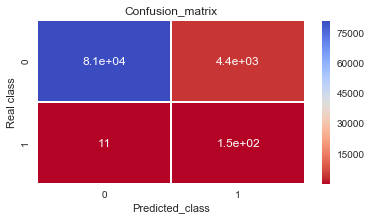


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.95      0.97     85278
          1       0.03      0.93      0.07       165

avg / total       1.00      0.95      0.97     85443



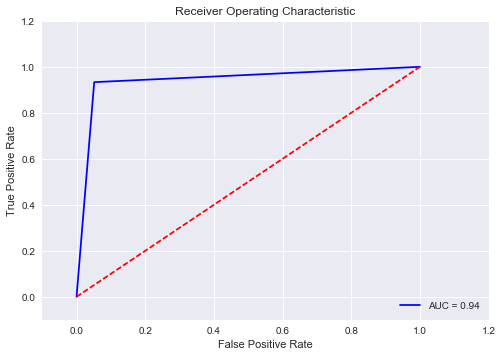

---------------------------------------------------------------


In [12]:
apply_log_regression(1)

In [13]:
#apply_log_regression(2)

The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 457
Length of test data: 197
The recall for this model is: 0.780220
TP: 71
TN: 105
FP: 1
FN: 20


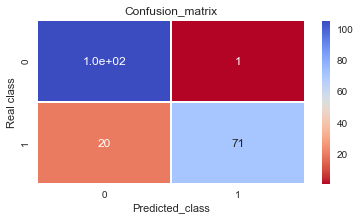


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.99      0.91       106
          1       0.99      0.78      0.87        91

avg / total       0.91      0.89      0.89       197



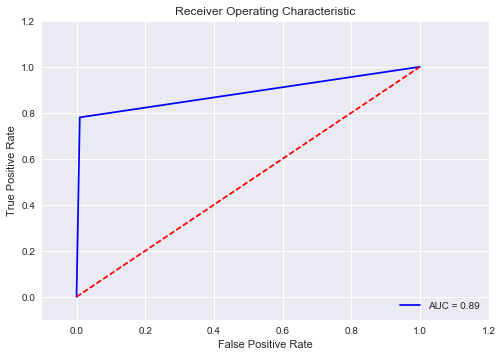

--------------------------Testing Set---------------------------
The recall for this model is: 0.848485
TP: 140
TN: 84612
FP: 666
FN: 25


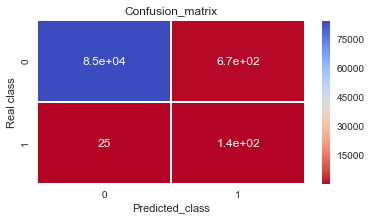


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85278
          1       0.17      0.85      0.29       165

avg / total       1.00      0.99      0.99     85443



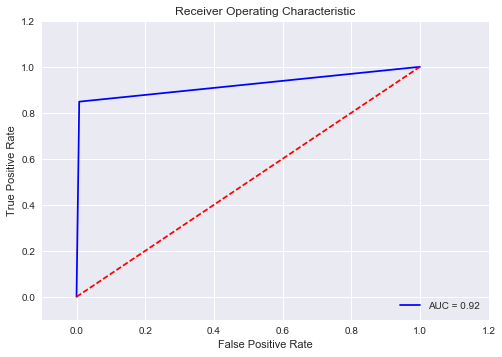

---------------------------------------------------------------


In [14]:
apply_naive_bayes(1)

#### (g) Vuelva a realizar los puntos (e) y (f), esta vez utilizando OverSampling [7] y SMOTE [8] (Hint: Para SMOTE usted puede apoyarse de la libreria imblearn)

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier # Random forest classifier

os = SMOTE(random_state=492)
print(y_tr["Class"].values.ravel())
#os_data_X,os_data_y=os.fit_sample(x_tr,y_tr)

[0 0 0 ..., 0 0 0]


In [22]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
columns =  x_tr.columns
#print(len(columns))
x_tr = x_tr.reset_index(drop=True)
x_ts["Class"] = y_ts["Class"]
x_ts = x_ts.reset_index(drop=True)

def apply_log_regression_smote():
    #Undersample_data = undersample(x_tr,i)
    os_data_X,os_data_y = os.fit_sample(x_tr,y_tr['Class'])
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
    #print("\n----------------------Validation Set------------------------")
    #print("\nThe model classification for " + str(i) + " proportion\n")
    clf=LogisticRegression()
    model(clf,os_data_X,x_ts,os_data_y,y_ts)
    print("---------------------------------------------------------------")

Length of training data: 199364
Length of test data: 85443


The recall for this model is: 1.000000
TP: 161
TN: 85282
FP: 0
FN: 0


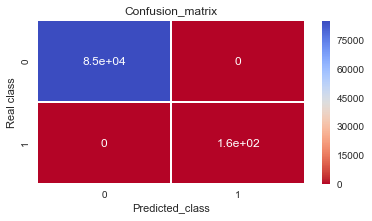


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85282
          1       1.00      1.00      1.00       161

avg / total       1.00      1.00      1.00     85443



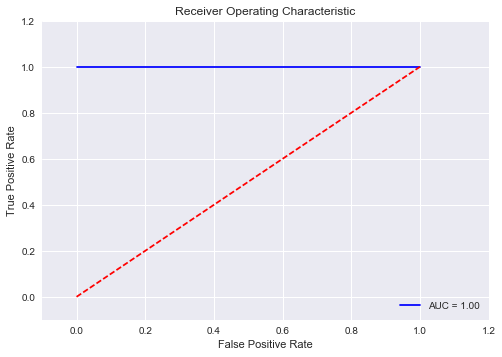

---------------------------------------------------------------


In [23]:
apply_log_regression_smote()

A continuación se implementara la función oversample, la cual es bastante simple ya que lo que hace es simplemente crear un nuevo dataset agregando n veces los datos de la clase minoritaria hasta lograr que la proporcion de las dos clases sea aproximadamente la misma.

In [54]:
def oversample(data):
    fraud_data=  data[data["Class"]==1]
    normal_data = data[data["Class"]==0]
    times = len(normal_data)/len(fraud_data)
    for i in range (round(times)): # the number is choosen by myself on basis of nnumber of fraud transaction
        normal_data = normal_data.append(fraud_data)
    os_data = normal_data 
    print("length of oversampled data is ",len(os_data))
    print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
    print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
    print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
    print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))
    return(os_data)

def apply_log_regression_os():
    oversample_data = oversample(x_tr)
    print("\n----------------------Validation Set------------------------")
    os_x,os_xt,os_yx,os_yxt=data_prepration(oversample_data)
    clf=LogisticRegression()
    model(clf,os_x,os_xt,os_yx,os_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,os_x,x_ts,os_yx,y_ts)
    print("---------------------------------------------------------------")
    
def apply_naive_bayes_os():
    oversample_data = oversample(x_tr)
    print("\n----------------------Validation Set------------------------")
    os_x,os_xt,os_yx,os_yxt=data_prepration(oversample_data)
    clf = BernoulliNB()
    model(clf,os_x,os_xt,os_yx,os_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,os_x,x_ts,os_yx,y_ts)
    print("---------------------------------------------------------------")

Length of training data: 199364
Length of test data: 85443
length of oversampled data is  397892
Number of normal transcation in oversampled data 199012
No.of fraud transcation 198880
Proportion of Normal data in oversampled data is  0.5001658741568064
Proportion of fraud data in oversampled data is  0.49983412584319364

----------------------Validation Set------------------------
Length of training data: 278524
Length of test data: 119368
The recall for this model is: 0.918228
TP: 54877
TN: 58098
FP: 1506
FN: 4887


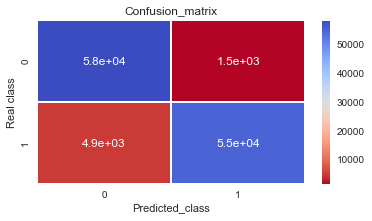


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95     59604
          1       0.97      0.92      0.94     59764

avg / total       0.95      0.95      0.95    119368



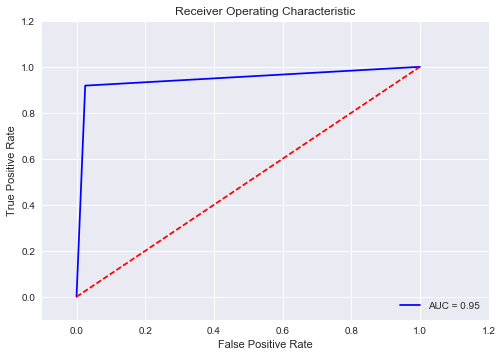

--------------------------Testing Set---------------------------
The recall for this model is: 0.928571
TP: 130
TN: 83164
FP: 2139
FN: 10


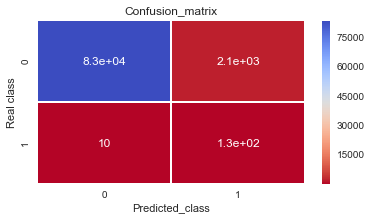


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85303
          1       0.06      0.93      0.11       140

avg / total       1.00      0.97      0.99     85443



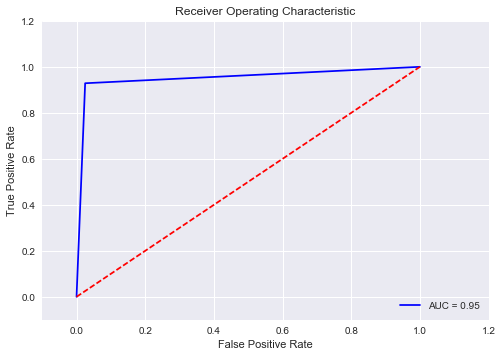

---------------------------------------------------------------


In [49]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]

apply_log_regression_os()

length of oversampled data is  397892
Number of normal transcation in oversampled data 199012
No.of fraud transcation 198880
Proportion of Normal data in oversampled data is  0.5001658741568064
Proportion of fraud data in oversampled data is  0.49983412584319364

----------------------Validation Set------------------------

----------------------Validation Set------------------------
Length of training data: 278524
Length of test data: 119368
The recall for this model is: 0.806586
TP: 48033
TN: 59336
FP: 481
FN: 11518


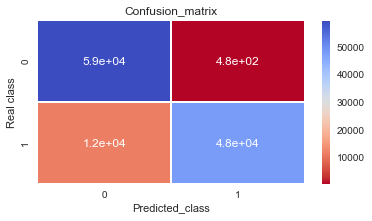


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.99      0.91     59817
          1       0.99      0.81      0.89     59551

avg / total       0.91      0.90      0.90    119368



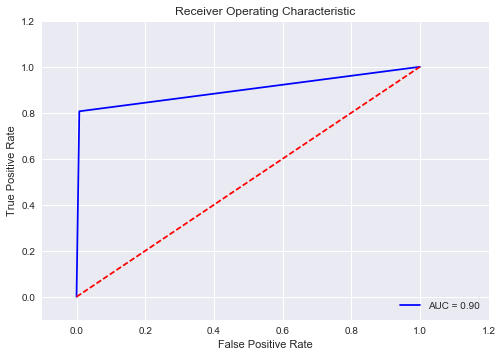

--------------------------Testing Set---------------------------
The recall for this model is: 0.835714
TP: 117
TN: 84611
FP: 692
FN: 23


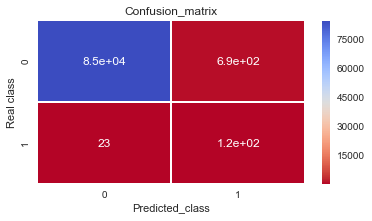


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85303
          1       0.14      0.84      0.25       140

avg / total       1.00      0.99      0.99     85443



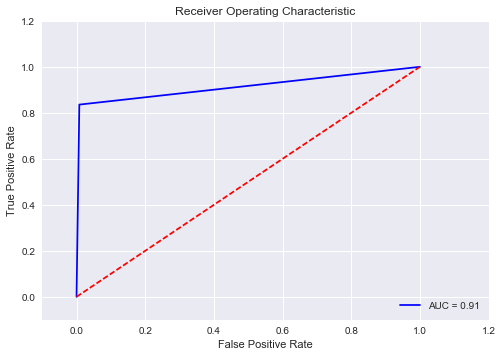

---------------------------------------------------------------


In [53]:
apply_naive_bayes_os()